In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
df = pd.read_csv('C:/Users/AME/Desktop/student-performance-prediction/Data/raw/student_data.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [73]:
df.sample(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
83,GP,M,15,U,LE3,T,2,2,services,services,...,5,3,3,1,3,4,4,15,15,15
146,GP,F,15,U,GT3,T,3,2,health,services,...,3,3,2,1,1,3,0,6,7,0
133,GP,F,16,U,GT3,A,3,4,services,other,...,3,2,1,1,4,5,16,12,11,11
300,GP,F,18,U,LE3,A,4,4,health,other,...,4,2,4,1,1,4,14,12,10,11
167,GP,F,16,U,GT3,T,4,2,health,services,...,4,2,3,1,1,3,0,14,15,16
388,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,0,7,9,8
249,GP,M,16,U,GT3,T,0,2,other,other,...,4,3,2,2,4,5,0,13,15,15
184,GP,F,16,U,GT3,T,3,2,other,other,...,1,2,2,1,2,1,14,12,13,12
175,GP,M,17,U,LE3,T,4,3,teacher,other,...,4,4,4,4,4,4,4,10,9,9
129,GP,M,16,R,GT3,T,4,4,teacher,teacher,...,3,5,5,2,5,4,8,18,18,18


In [74]:
df.shape

(395, 33)

In [53]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   school      395 non-null    str  
 1   sex         395 non-null    str  
 2   age         395 non-null    int64
 3   address     395 non-null    str  
 4   famsize     395 non-null    str  
 5   Pstatus     395 non-null    str  
 6   Medu        395 non-null    int64
 7   Fedu        395 non-null    int64
 8   Mjob        395 non-null    str  
 9   Fjob        395 non-null    str  
 10  reason      395 non-null    str  
 11  guardian    395 non-null    str  
 12  traveltime  395 non-null    int64
 13  studytime   395 non-null    int64
 14  failures    395 non-null    int64
 15  schoolsup   395 non-null    str  
 16  famsup      395 non-null    str  
 17  paid        395 non-null    str  
 18  activities  395 non-null    str  
 19  nursery     395 non-null    str  
 20  higher      395 non-null    str  
 21  inte

In [78]:
categorical_cols = df.select_dtypes(include="object").columns

for col in categorical_cols:
    print(col, ":", df[col].unique())


school : <StringArray>
['GP', 'MS']
Length: 2, dtype: str
sex : <StringArray>
['F', 'M']
Length: 2, dtype: str
address : <StringArray>
['U', 'R']
Length: 2, dtype: str
famsize : <StringArray>
['GT3', 'LE3']
Length: 2, dtype: str
Pstatus : <StringArray>
['A', 'T']
Length: 2, dtype: str
Mjob : <StringArray>
['at_home', 'health', 'other', 'services', 'teacher']
Length: 5, dtype: str
Fjob : <StringArray>
['teacher', 'other', 'services', 'health', 'at_home']
Length: 5, dtype: str
reason : <StringArray>
['course', 'other', 'home', 'reputation']
Length: 4, dtype: str
guardian : <StringArray>
['mother', 'father', 'other']
Length: 3, dtype: str
schoolsup : <StringArray>
['yes', 'no']
Length: 2, dtype: str
famsup : <StringArray>
['no', 'yes']
Length: 2, dtype: str
paid : <StringArray>
['no', 'yes']
Length: 2, dtype: str
activities : <StringArray>
['no', 'yes']
Length: 2, dtype: str
nursery : <StringArray>
['yes', 'no']
Length: 2, dtype: str
higher : <StringArray>
['yes', 'no']
Length: 2, dtype: 

C:\Users\AME\AppData\Local\Temp\ipykernel_10708\3093250407.py:1: Pandas4Warning: For backward compatibility, 'str' dtypes are included by select_dtypes when 'object' dtype is specified. This behavior is deprecated and will be removed in a future version. Explicitly pass 'str' to `include` to select them, or to `exclude` to remove them and silence this warning.
See https://pandas.pydata.org/docs/user_guide/migration-3-strings.html#string-migration-select-dtypes for details on how to write code that works with pandas 2 and 3.
  categorical_cols = df.select_dtypes(include="object").columns


In [54]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [81]:
df = pd.get_dummies(df, drop_first=True)

In [84]:
df.sample(5)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
340,19,2,1,1,3,1,4,3,4,1,...,False,True,False,False,True,True,True,True,True,True
34,16,3,2,1,1,0,5,4,3,1,...,True,False,False,True,True,False,False,True,True,False
166,16,2,2,1,2,0,4,3,5,2,...,False,False,False,False,False,False,True,False,True,False
366,18,4,4,2,3,0,4,2,2,2,...,True,False,False,False,True,False,True,True,True,True
353,19,1,1,3,1,1,4,4,4,3,...,False,True,False,True,False,False,True,True,True,False


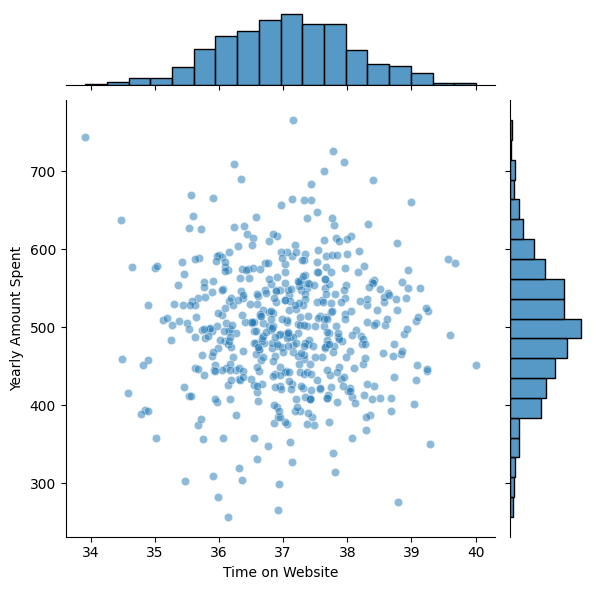

In [45]:
sns.jointplot(x="Time on Website",y="Yearly Amount Spent", data=df, alpha=0.5)

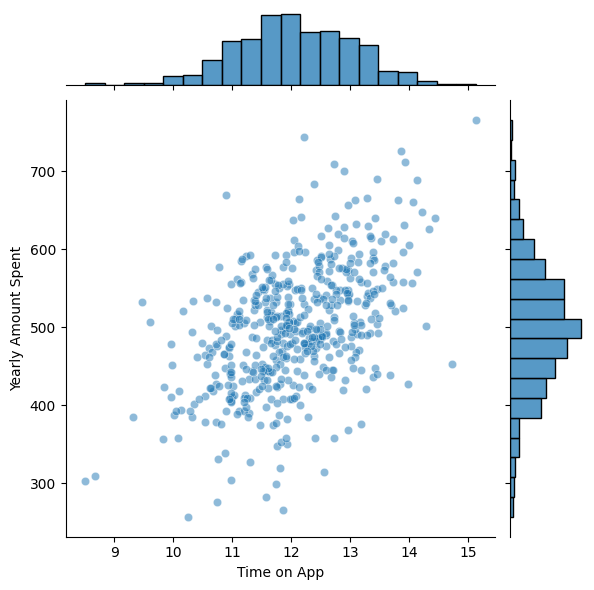

In [46]:
sns.jointplot(x="Time on App",y="Yearly Amount Spent", data=df, alpha=0.5)